In [1]:
%matplotlib inline
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
#-*- coding:uft-8 -*-

In [3]:
인구 = pd.read_csv('인구.csv',encoding='CP949')
인구밀도 = pd.read_csv('인구밀도.csv',encoding='CP949')
GDP = pd.read_csv('GDP.csv',encoding='CP949')
출산율 = pd.read_csv('출산율.csv',encoding='CP949')
정부지출 = pd.read_csv('정부지출.csv',encoding='CP949')
사망률 = pd.read_csv('사망률.csv',encoding='CP949')
맥도날드 = pd.read_csv("McDonald's.csv",encoding='CP949')
스타벅스 = pd.read_csv('starbucks.csv',encoding='CP949')
미국면적 = pd.read_csv('미국 면적.csv',encoding='CP949')
미국인구 = pd.read_csv('미국 인구.csv',encoding='CP949')
미국집값상승률 = pd.read_csv('미국 집값 상승률.csv',encoding='CP949')
미국GDP = pd.read_csv('미국GDP.csv',encoding='CP949')
미국PCPI = pd.read_csv('미국PCPI.csv',encoding='CP949')
미국집값 = pd.read_csv('미국 집값.csv',encoding='CP949')
미국이주율 = pd.read_csv('미국이주율.csv',encoding='CP949')
미국집값=미국집값.set_index('state')
미국이주율=미국이주율.set_index('state')
미국집값상승률=미국집값상승률.set_index('state')
미국GDP=미국GDP.set_index('state')
미국PCPI=미국PCPI.set_index('state')
스타벅스=스타벅스.set_index('state')
맥도날드=맥도날드.set_index('state')
미국면적=미국면적.set_index('state')
미국인구=미국인구.set_index('state')
인구=인구.set_index('Country Name')
인구밀도=인구밀도.set_index('Country Name')#한 사람당 면적
GDP=GDP.set_index('Country Name')#millon
사망률=사망률.set_index('Country Name')#1000명당
정부지출=정부지출.set_index('Country Name')#millon
출산율=출산율.set_index('Country Name')#1000명당
인구=인구.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
인구밀도=인구밀도.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
GDP=GDP.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
사망률=사망률.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
정부지출=정부지출.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
출산율=출산율.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)

미국집값상승률1=미국집값상승률[미국집값상승률['period']=='2020-Q4']
미국집값상승률2=미국집값상승률[미국집값상승률['period']=='2019-Q4']
미국집값상승률=pd.DataFrame(미국집값상승률1['index_sa']-미국집값상승률2['index_sa'])
#미국집값상승률=미국집값상승률['Last']-미국집값상승률['1Y Ago']
미국데이터= pd.concat([(미국인구['population']),(미국면적['km2']),미국GDP['2018-Q1']],axis=1)
미국데이터['집값상승률']=(미국집값상승률)
미국데이터['pcpi']=미국PCPI['2018']/미국인구['population']
미국데이터['인구밀도']=미국데이터['population']/미국데이터['km2']
미국데이터['미국집값']=미국집값['single-family']
미국데이터['면적당스타벅스']=스타벅스['value']/미국데이터['km2']
미국데이터['인구당스타벅스']=스타벅스['value']/미국데이터['population']
미국데이터['면적당맥도날드']=맥도날드["McDonald's"]/미국데이터['km2']
미국데이터['인구당맥도날드']=맥도날드["McDonald's"]/미국데이터['population']
미국데이터['이주율']=미국이주율['1000명당 이주율']
미국데이터

,population,km2,2018-Q1,집값상승률,pcpi,인구밀도,미국집값,면적당스타벅스,인구당스타벅스,면적당맥도날드,인구당맥도날드,이주율
state,,,,,,,,,,,,
Alabama,4903185,131171,197154.4,19.18,0.042575,37.380099,146534.0,0.000252,0.000007,0.001601,0.000043,1.91
Alaska,731545,1477953,52871.3,23.97,0.060652,0.494972,311194.0,0.000016,0.000033,0.000018,0.000037,-12.96
Arizona,7278717,294207,311712.7,46.46,0.043857,24.740122,290075.0,0.000836,0.000034,0.000721,0.000029,12.50
Arkansas,3017825,134771,116118.2,19.15,0.043209,22.392243,131577.0,0.000096,0.000004,0.000942,0.000042,0.83
California,39512223,403466,2680610.4,29.21,0.063639,97.931977,346944.0,0.004967,0.000051,0.002887,0.000029,-5.15
Colorado,5758736,268431,339705.9,45.13,0.058206,21.453319,422369.0,0.001166,0.000054,0.000674,0.000031,5.44
Connecticut,3565287,12542,249589.4,27.69,0.074986,284.267820,278008.0,0.005820,0.000020,0.011402,0.000040,-6.19
Delaware,705749,5047,62349.7,20.04,0.072410,139.835348,264627.0,0.002972,0.000021,0.006737,0.000048,7.15
D.C,973764,158,121744.9,22.46,0.058531,6163.063291,NaN,0.386076,0.000063,1.588608,0.000258,-3.12


In [4]:
plt.rcParams["figure.figsize"] = (10,10)


In [5]:
(정부지출['2018']*1000000/인구['2018']).dropna().sort_values()


Country Name
World                     0.002244
IDA & IBRD total          0.002373
Low & middle income       0.002387
Middle income             0.002670
IBRD only                 0.003247
                          ...     
Faroe Islands           594.627771
Kiribati                637.706945
Greenland               787.715641
Marshall Islands        964.645747
Palau                  1850.792581
Name: 2018, Length: 211, dtype: float64

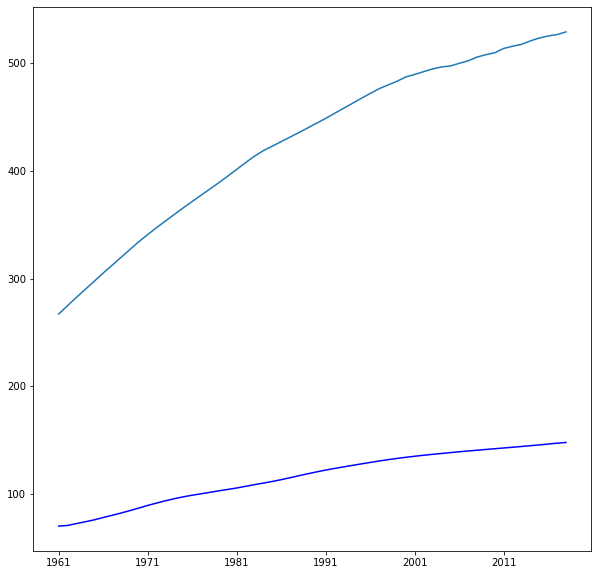

In [6]:
#출산율.loc['Korea, Rep.'].dropna().astype(float).plot()
#사망률.loc['Korea, Rep.'].dropna().astype(float).plot()
(인구밀도.loc['Korea, Rep.']).dropna().astype(float).plot()
(인구밀도.loc['China']).dropna().astype(float).plot(color='b')

In [7]:
인구=인구.loc[['Slovenia','Lithuania','Russian Federation','Romania','Argentina','Estonia','Latvia','Slovak Republic','Finland','Hungary','Mexico','Czech Republic','Bulgaria','Turkey','Germany','Austria','Brazil','Netherlands','Chile','Switzerland','Denmark','United Kingdom','Italy','South Africa','Sweden','Japan','Spain','Belgium','United States','Canada','Portugal','Israel','France','Poland','Colombia','Norway','China','New Zealand','Greece','India','Indonesia','Ireland','Australia','Korea, Rep.']]
GDP=GDP.loc[['Slovenia','Lithuania','Russian Federation','Romania','Argentina','Estonia','Latvia','Slovak Republic','Finland','Hungary','Mexico','Czech Republic','Bulgaria','Turkey','Germany','Austria','Brazil','Netherlands','Chile','Switzerland','Denmark','United Kingdom','Italy','South Africa','Sweden','Japan','Spain','Belgium','United States','Canada','Portugal','Israel','France','Poland','Colombia','Norway','China','New Zealand','Greece','India','Indonesia','Ireland','Australia','Korea, Rep.']]
인구['2018']

Country Name
Slovenia              2.073894e+06
Lithuania             2.801543e+06
Russian Federation    1.444779e+08
Romania               1.947254e+07
Argentina             4.449450e+07
Estonia               1.321977e+06
Latvia                1.927174e+06
Slovak Republic       5.446771e+06
Finland               5.515525e+06
Hungary               9.775564e+06
Mexico                1.261908e+08
Czech Republic        1.062993e+07
Bulgaria              7.025037e+06
Turkey                8.231972e+07
Germany               8.290578e+07
Austria               8.840521e+06
Brazil                2.094693e+08
Netherlands           1.723162e+07
Chile                 1.872916e+07
Switzerland           8.514329e+06
Denmark               5.793636e+06
United Kingdom        6.646034e+07
Italy                 6.042176e+07
South Africa          5.777962e+07
Sweden                1.017521e+07
Japan                 1.265291e+08
Spain                 4.679775e+07
Belgium               1.142705e+07
United 

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


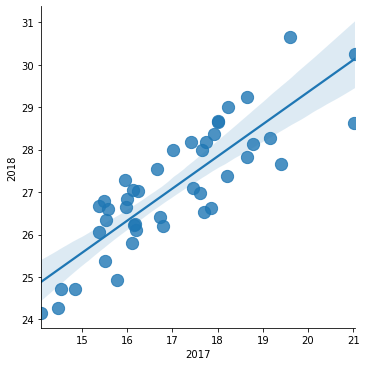

In [8]:
data = pd.concat([np.log(인구['2017']),np.log(GDP['2018'])],axis=1)
data=data.loc[['Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','China','Colombia','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','India','Indonesia','Ireland','Israel','Italy','Japan','Korea, Rep.','Latvia','Lithuania','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Romania','Russian Federation','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States']]
sns.lmplot('2017','2018',data=data,fit_reg=True,scatter_kws={"s":150})

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


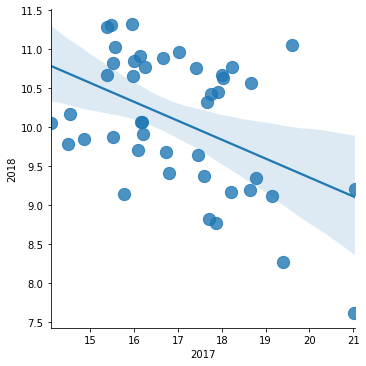

In [9]:
data = pd.concat([(인구['2017']),(GDP['2018'])],axis=1)
data=data.loc[['Argentina','Australia','Austria','Belgium','Brazil','Bulgaria','Canada','Chile','China','Colombia','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','India','Indonesia','Ireland','Israel','Italy','Japan','Korea, Rep.','Latvia','Lithuania','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Romania','Russian Federation','Slovak Republic','Slovenia','South Africa','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States']]
data['2018']=np.log(data['2018']/data['2017'])
data['2017']=np.log(data['2017'])
sns.lmplot('2017','2018',data=data,fit_reg=True,scatter_kws={"s":150})

미국 데이터

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


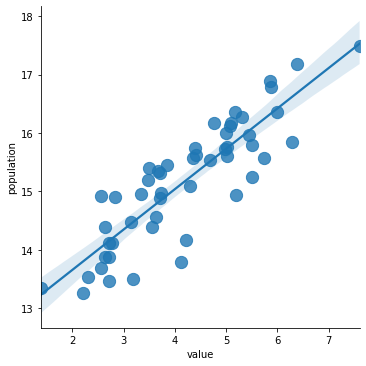

In [10]:
data = pd.concat([np.log(스타벅스['value']),np.log(미국인구['population'])],axis=1)
sns.lmplot("value",'population',data=data,fit_reg=True,scatter_kws={"s":150})

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: Runtim

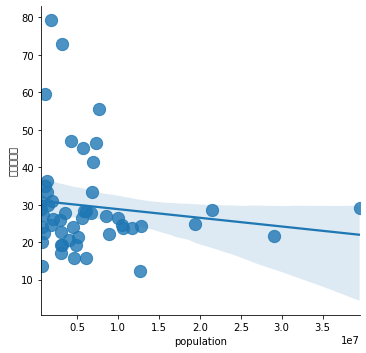

In [11]:
data = pd.concat([(미국인구['population']),(미국데이터['집값상승률'])],axis=1)
sns.lmplot('population','집값상승률',data=data,fit_reg=True,scatter_kws={"s":150})

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49828 missing 

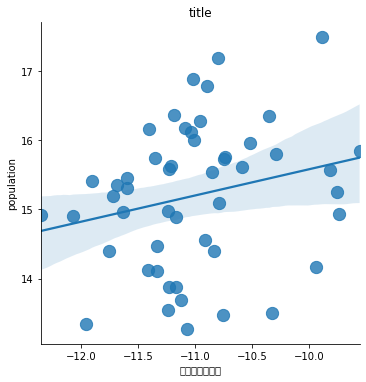

In [12]:
data = pd.concat([np.log(미국데이터['인구당스타벅스']),np.log(미국데이터['population'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('인구당스타벅스','population',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47589 missing 

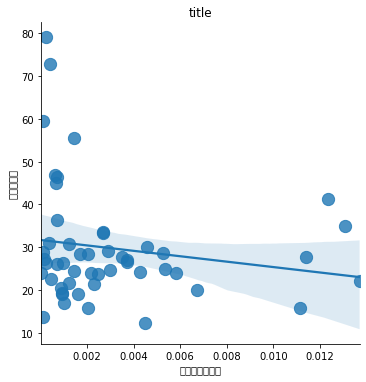

In [13]:
data = pd.concat([(미국데이터['면적당맥도날드']),(미국데이터['집값상승률'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('면적당맥도날드','집값상승률',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

In [14]:
미국데이터

,population,km2,2018-Q1,집값상승률,pcpi,인구밀도,미국집값,면적당스타벅스,인구당스타벅스,면적당맥도날드,인구당맥도날드,이주율
state,,,,,,,,,,,,
Alabama,4903185,131171,197154.4,19.18,0.042575,37.380099,146534.0,0.000252,0.000007,0.001601,0.000043,1.91
Alaska,731545,1477953,52871.3,23.97,0.060652,0.494972,311194.0,0.000016,0.000033,0.000018,0.000037,-12.96
Arizona,7278717,294207,311712.7,46.46,0.043857,24.740122,290075.0,0.000836,0.000034,0.000721,0.000029,12.50
Arkansas,3017825,134771,116118.2,19.15,0.043209,22.392243,131577.0,0.000096,0.000004,0.000942,0.000042,0.83
California,39512223,403466,2680610.4,29.21,0.063639,97.931977,346944.0,0.004967,0.000051,0.002887,0.000029,-5.15
Colorado,5758736,268431,339705.9,45.13,0.058206,21.453319,422369.0,0.001166,0.000054,0.000674,0.000031,5.44
Connecticut,3565287,12542,249589.4,27.69,0.074986,284.267820,278008.0,0.005820,0.000020,0.011402,0.000040,-6.19
Delaware,705749,5047,62349.7,20.04,0.072410,139.835348,264627.0,0.002972,0.000021,0.006737,0.000048,7.15
D.C,973764,158,121744.9,22.46,0.058531,6163.063291,NaN,0.386076,0.000063,1.588608,0.000258,-3.12


C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49828 missing 

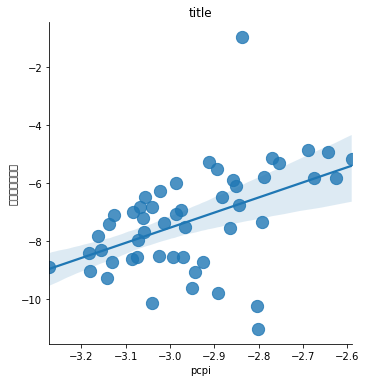

In [15]:
data = pd.concat([np.log(미국데이터['pcpi']),np.log(미국데이터['면적당스타벅스'])],axis=1)
#data.drop(data.index[8],inplace=True)
g=sns.lmplot('pcpi','면적당스타벅스',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49849 missing 

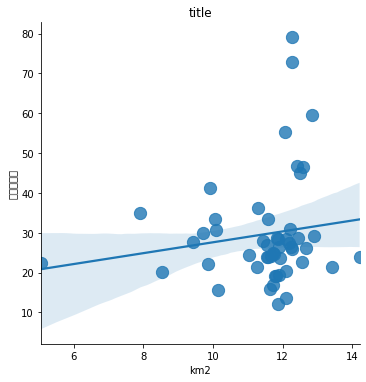

In [16]:
data = pd.concat([np.log(미국데이터['km2']),(미국데이터['집값상승률'])],axis=1)
#data.drop(data.index[8],inplace=True)
g=sns.lmplot('km2','집값상승률',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44050 missing 

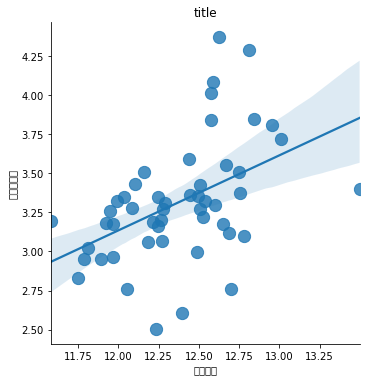

In [17]:
data = pd.concat([np.log(미국데이터['미국집값']),np.log(미국데이터['집값상승률'])],axis=1)
#data.drop(data.index[8],inplace=True)
g=sns.lmplot('미국집값','집값상승률',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


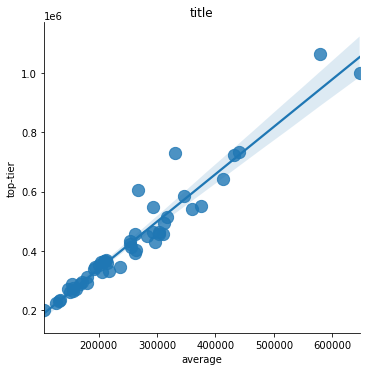

In [18]:
data = pd.concat([(미국집값['average']),(미국집값['top-tier'])],axis=1)
#data.drop(data.index[8],inplace=True)
g=sns.lmplot('average','top-tier',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46020 missing 

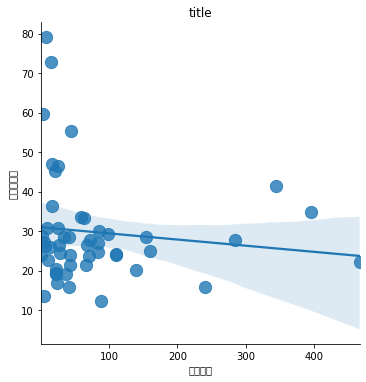

In [19]:
data = pd.concat([(미국데이터['인구밀도']),(미국데이터['집값상승률'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('인구밀도','집값상승률',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46020 missing 

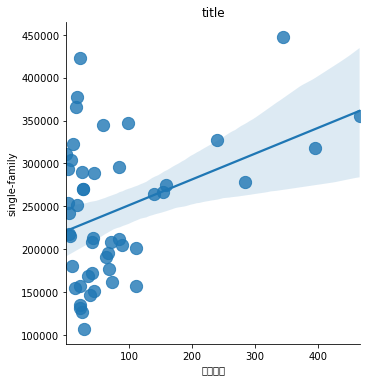

In [20]:
data = pd.concat([(미국데이터['인구밀도']),(미국집값['single-family'])],axis=1)
data.drop(data.index[8],inplace=True)
data.drop(data.index[10],inplace=True)
g=sns.lmplot('인구밀도','single-family',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

In [21]:
data

,인구밀도,single-family
state,,
Alabama,37.380099,146534.0
Alaska,0.494972,311194.0
Arizona,24.740122,290075.0
Arkansas,22.392243,131577.0
California,97.931977,346944.0
Colorado,21.453319,422369.0
Connecticut,284.267820,278008.0
Delaware,139.835348,264627.0
Florida,154.641810,266350.0


C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49849 missing 

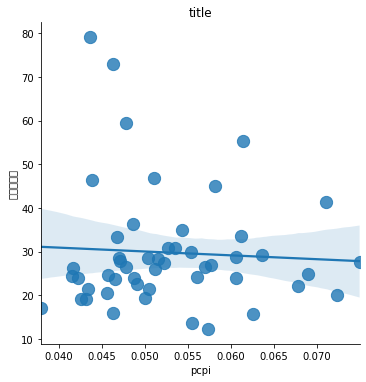

In [22]:
data = pd.concat([(미국데이터['pcpi']),(미국데이터['집값상승률'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('pcpi','집값상승률',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


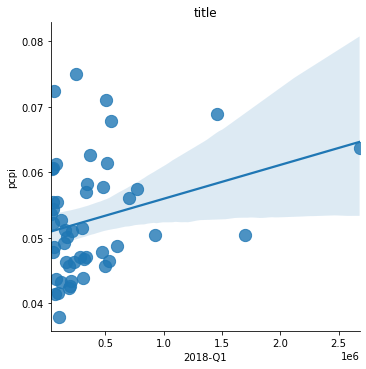

In [23]:
data = pd.concat([(미국데이터['2018-Q1']),(미국데이터['pcpi'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('2018-Q1','pcpi',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46020 missing 

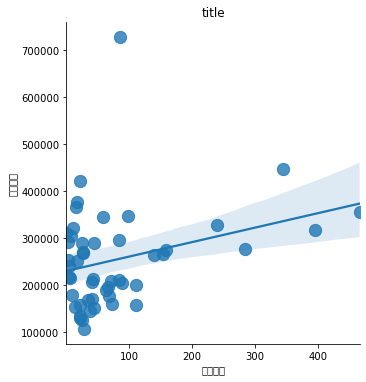

In [24]:
data = pd.concat([(미국데이터['인구밀도']),(미국데이터['미국집값'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('인구밀도','미국집값',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

In [25]:
a=미국데이터['인구밀도']<120
b=미국데이터['미국집값']>250000
ab=미국데이터[a&b]
ab

,population,km2,2018-Q1,집값상승률,pcpi,인구밀도,미국집값,면적당스타벅스,인구당스타벅스,면적당맥도날드,인구당맥도날드,이주율
state,,,,,,,,,,,,
Alaska,731545,1477953,52871.3,23.97,0.060652,0.494972,311194.0,0.000016,0.000033,0.000018,0.000037,-12.96
Arizona,7278717,294207,311712.7,46.46,0.043857,24.740122,290075.0,0.000836,0.000034,0.000721,0.000029,12.50
California,39512223,403466,2680610.4,29.21,0.063639,97.931977,346944.0,0.004967,0.000051,0.002887,0.000029,-5.15
Colorado,5758736,268431,339705.9,45.13,0.058206,21.453319,422369.0,0.001166,0.000054,0.000674,0.000031,5.44
Hawaii,1415872,16635,81932.6,30.00,0.055398,85.114037,727931.0,0.004088,0.000048,0.004569,0.000054,-9.76
Idaho,1787065,214045,71737.7,79.16,0.043643,8.349015,304036.0,0.000164,0.000020,0.000234,0.000028,15.31
Maine,1344212,79883,56998.8,36.32,0.048605,16.827260,252014.0,0.000200,0.000012,0.000726,0.000043,4.92
Minnesota,5639632,206232,334381.4,26.41,0.057032,27.346057,270308.0,0.000529,0.000019,0.000984,0.000036,0.01
Montana,1068778,376962,46324.4,59.54,0.047828,2.835241,293244.0,0.000040,0.000014,0.000109,0.000038,5.64


In [26]:
미국데이터['이주율'].sort_values()

state
Alaska           -12.96
Hawaii            -9.76
New York          -9.29
Illinois          -8.28
Connecticut       -6.19
Louisiana         -5.60
New Jersey        -5.51
California        -5.15
Massachusetts     -4.36
Kansas            -4.24
West Virginia     -3.95
Maryland          -3.91
Mississippi       -3.61
D.C               -3.12
Rhode Island      -3.03
Michigan          -2.37
Nebraska          -2.18
Wyoming           -1.75
North Dakota      -1.66
Iowa              -1.59
Pennsylvania      -1.53
Ohio              -1.10
Vermont           -1.09
Virginia          -1.07
New Mexico        -1.02
Kentucky          -0.34
Wisconsin         -0.25
Missouri          -0.12
Minnesota          0.01
Indiana            0.59
Arkansas           0.83
Oklahoma           0.97
South Dakota       1.09
Alabama            1.91
New Hampshire      3.29
Texas              4.33
Georgia            4.68
Utah               4.86
Washington         4.92
Maine              4.92
Tennessee          5.27
Colorado  

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51665 missing 

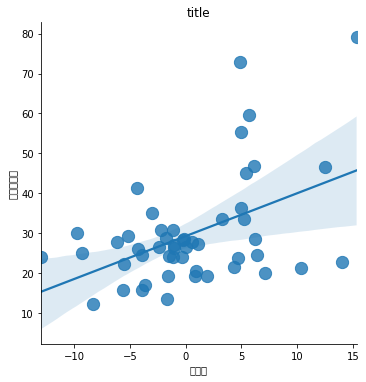

In [27]:
data = pd.concat([(미국데이터['이주율']),(미국데이터['집값상승률'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('이주율','집값상승률',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48120 missing 

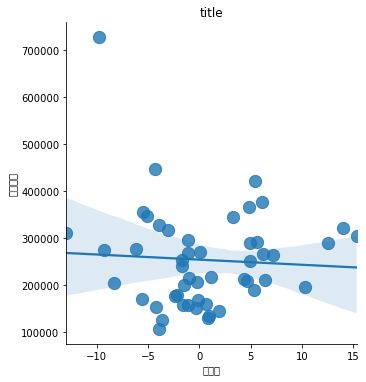

In [28]:
data = pd.concat([(미국데이터['이주율']),(미국데이터['미국집값'])],axis=1)
data.drop(data.index[8],inplace=True)
g=sns.lmplot('이주율','미국집값',data=data,fit_reg=True,scatter_kws={"s":150})
#g = (g.set_axis_labels("인구밀도","index_sa").set(xlim=(0,6500),ylim=(0,500)))
plt.title("title")
plt.show(g)

In [29]:
미국데이터['미국집값'].sort_values()

state
West Virginia     106840.0
Mississippi       126294.0
Arkansas          131577.0
Oklahoma          134995.0
Alabama           146534.0
Kentucky          150877.0
Kansas            154777.0
Iowa              157261.0
Ohio              157386.0
Indiana           161291.0
Missouri          168392.0
Louisiana         171948.0
Michigan          177403.0
Nebraska          180496.0
Tennessee         191164.0
South Carolina    195761.0
Pennsylvania      201300.0
Illinois          205201.0
Wisconsin         207906.0
Georgia           208466.0
North Carolina    212247.0
Texas             213666.0
New Mexico        215378.0
South Dakota      217789.0
North Dakota      241803.0
Maine             252014.0
Wyoming           254065.0
Delaware          264627.0
Florida           266350.0
Vermont           269754.0
Minnesota         270308.0
New York          275426.0
Connecticut       278008.0
Washington        289328.0
Arizona           290075.0
Montana           293244.0
Virginia          2959

In [30]:
미국데이터['population'].sort_values()

state
Wyoming             578759
Vermont             623989
Delaware            705749
Alaska              731545
North Dakota        762062
South Dakota        884659
D.C                 973764
Rhode Island       1059361
Montana            1068778
Maine              1344212
New Hampshire      1359711
Hawaii             1415872
Idaho              1787065
West Virginia      1792147
Nebraska           1934408
New Mexico         2096829
Kansas             2913314
Mississippi        2976149
Arkansas           3017825
Nevada             3080156
Iowa               3155070
Utah               3205958
Connecticut        3565287
Oklahoma           3956971
Oregon             4217737
Kentucky           4467673
Louisiana          4648794
Alabama            4903185
South Carolina     5148714
Minnesota          5639632
Colorado           5758736
Wisconsin          5822434
Maryland           6045680
Missouri           6137428
Indiana            6732219
Tennessee          6833174
Massachusetts      694

In [31]:
미국데이터['km2'].sort_values()

state
D.C                   158
Rhode Island         2678
Delaware             5047
Connecticut         12542
Hawaii              16635
New Jersey          19047
Massachusetts       20202
New Hampshire       23187
Vermont             23871
Maryland            25142
West Virginia       62259
South Carolina      77857
Maine               79883
Indiana             92789
Kentucky           102269
Virginia           102279
Ohio               105829
Tennessee          106798
Louisiana          111898
Pennsylvania       115883
Mississippi        121531
New York           122057
North Carolina     125920
Alabama            131171
Arkansas           134771
Florida            138887
Wisconsin          140268
Illinois           143793
Iowa               144669
Michigan           146435
Georgia            148959
Washington         172119
Oklahoma           177660
Missouri           178040
North Dakota       178711
South Dakota       196350
Nebraska           198974
Minnesota          206232
Kansas

In [32]:
미국데이터['인구밀도'].sort_values()

state
Alaska               0.494972
Wyoming              2.301503
Montana              2.835241
North Dakota         4.264214
South Dakota         4.505521
New Mexico           6.674377
Idaho                8.349015
Nebraska             9.721913
Nevada              10.832956
Kansas              13.758012
Utah                15.064318
Maine               16.827260
Oregon              16.965411
Colorado            21.453319
Iowa                21.808888
Oklahoma            22.272718
Arkansas            22.392243
Mississippi         24.488805
Arizona             24.740122
Vermont             26.140044
Minnesota           27.346057
West Virginia       28.785348
Missouri            34.472186
Alabama             37.380099
Wisconsin           41.509354
Louisiana           41.544925
Texas               42.856101
Kentucky            43.685506
Washington          44.242024
New Hampshire       58.641092
Tennessee           63.982228
South Carolina      66.130393
Michigan            68.199932
Geor

In [33]:
미국데이터['집값상승률'].sort_values()

state
Illinois          12.22
North Dakota      13.59
Maryland          15.76
Louisiana         15.82
Mississippi       16.99
Arkansas          19.15
Alabama           19.18
Iowa              19.33
Delaware          20.04
Oklahoma          20.51
South Carolina    21.37
Texas             21.53
New Jersey        22.18
D.C               22.46
Nevada            22.67
Georgia           23.70
Ohio              23.92
Alaska            23.97
Kentucky          24.04
Pennsylvania      24.24
West Virginia     24.48
North Carolina    24.62
New York          24.97
Kansas            25.97
New Mexico        26.28
Minnesota         26.41
Michigan          26.55
Virginia          26.96
South Dakota      27.36
Connecticut       27.69
Indiana           27.82
Wisconsin         28.39
Missouri          28.44
Florida           28.58
Wyoming           28.81
California        29.21
Hawaii            30.00
Vermont           30.73
Nebraska          30.91
Tennessee         33.43
New Hampshire     33.47
Rhode Isla

C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeW

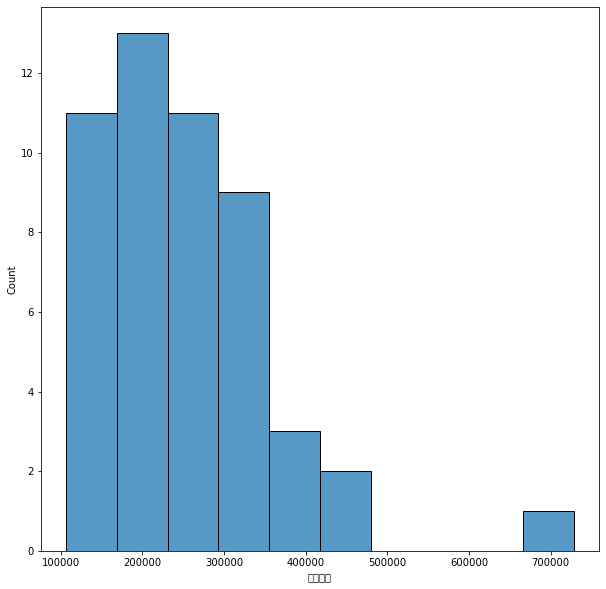

In [34]:
sns.histplot(x='미국집값', data=미국데이터)

In [35]:
국내집값 = pd.read_csv('국내집값.csv',encoding='CP949')
국내집값=국내집값[국내집값['지역별(2)'].isin(['서울','인천','경기','부산','대구','광주','대전','울산','세종','강원','충북','충남','전북','전남','경북','경남','제주'])]
국내집값=국내집값.set_index('지역별(2)')

In [36]:
국내집값=국내집값.loc[:,['2015. 10','2015. 11','2015. 12',
         '2016. 01','2016. 02','2016. 03','2016. 04','2016. 05','2016. 06','2016. 07','2016. 08','2016. 09','2016. 10','2016. 11','2016. 12',
         '2017. 01','2017. 02','2017. 03','2017. 04','2017. 05','2017. 06','2017. 07','2017. 08','2017. 09','2017. 10','2017. 11','2017. 12',
         '2018. 01','2018. 02','2018. 03','2018. 04','2018. 05','2018. 06','2018. 07','2018. 08','2018. 09','2018. 10','2018. 11','2018. 12',
         '2019. 01','2019. 02','2019. 03','2019. 04','2019. 05','2019. 06','2019. 07','2019. 08','2019. 09','2019. 10','2019. 11','2019. 12',
         '2020. 01','2020. 02','2020. 03','2020. 04','2020. 05','2020. 06','2020. 07','2020. 08','2020. 09','2020. 10','2020. 11','2020. 12',
         '2021. 01','2021. 02']]

In [37]:
국내집값=국내집값.fillna(3000)
국내집값=국내집값.astype(int)
국내집값

,2015. 10,2015. 11,2015. 12,2016. 01,2016. 02,2016. 03,2016. 04,2016. 05,2016. 06,2016. 07,...,2020. 05,2020. 06,2020. 07,2020. 08,2020. 09,2020. 10,2020. 11,2020. 12,2021. 01,2021. 02
지역별(2),,,,,,,,,,,,,,,,,,,,,
서울,5841,6050,6041,6108,6111,6173,6241,6264,6208,6254,...,8191,8351,8110,8098,8114,8079,8234,8566,8566,8540
인천,3163,3184,3184,3191,3192,3190,3238,3179,3204,3222,...,4345,4443,4435,4642,4642,4720,4769,4752,4728,4743
경기,3138,3098,3198,3198,3219,3215,3199,3443,3542,3531,...,4225,4117,4340,4234,4272,4346,4339,4386,4368,4382
부산,3112,3131,3127,3152,3154,3178,3169,3148,3150,3158,...,4022,4022,4081,4020,4020,3974,4112,4256,4254,4292
대구,2682,2749,2962,3086,3064,3119,3132,3132,3134,3130,...,4647,4598,4640,4634,4644,4668,4684,4644,4653,4645
광주,2420,2424,2476,2569,2569,2590,2700,2722,2737,2742,...,3833,3818,3845,3694,3722,3722,3745,3703,3911,4213
대전,2454,2454,2454,2454,2454,2454,2449,2465,2562,2562,...,3336,3408,3349,3328,3281,3206,3206,3206,3206,3442
울산,3053,3043,3043,3046,3046,3066,3072,3077,3069,3069,...,3324,3749,3876,4135,4162,4183,4183,4190,4178,4178
세종,2642,2648,2665,2665,2665,2670,2680,2680,2683,2687,...,3000,3000,3000,3000,3000,3424,3424,3424,3798,3798


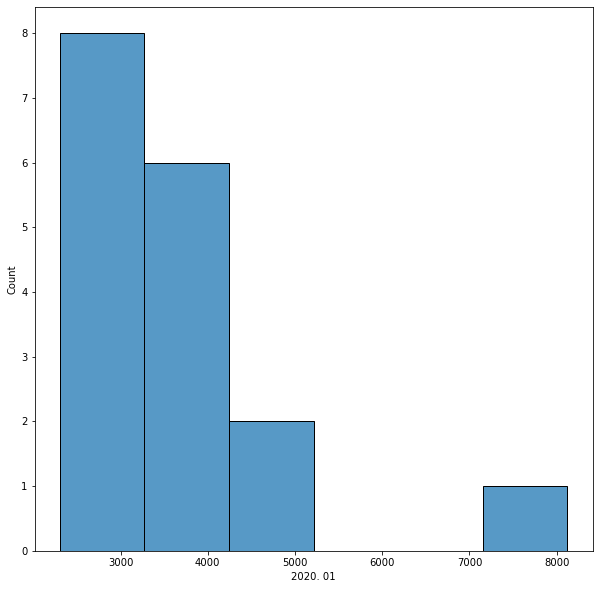

In [38]:
sns.histplot(x='2020. 01', data=국내집값)

In [39]:
국내인구밀도 = pd.read_csv('국내인구밀도.csv',encoding='CP949')
국내인구밀도=국내인구밀도.set_index('지역')
국내인구밀도=국내인구밀도.astype(int)
국내인구밀도

,2016인구,2016인구밀도,2017인구,2017인구밀도,2018인구,2018인구밀도,2019인구,2019인구밀도,2020인구,2020인구밀도
지역,,,,,,,,,,
서울,9843,16263,9766,16136,9705,16034,9662,15964,9602,15865
부산,3447,4477,3424,4447,3400,4416,3373,4380,3344,4342
대구,2461,2786,2458,2782,2450,2773,2432,2753,2419,2738
인천,2907,2736,2924,2750,2939,2764,2944,2769,2951,2770
광주,1502,2997,1495,2984,1493,2980,1494,2980,1488,2969
대전,1536,2848,1528,2832,1518,2813,1509,2796,1500,2780
울산,1166,1099,1159,1092,1154,1088,1147,1080,1140,1073
세종,234,504,266,571,304,653,331,712,349,750
경기,12600,1237,12786,1255,13031,1279,13238,1299,13405,1315


C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46020 missing 

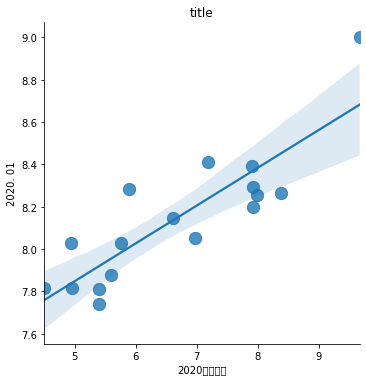

In [40]:
data = pd.concat([np.log(국내인구밀도['2020인구밀도']),np.log(국내집값['2020. 01'])],axis=1)
g=sns.lmplot('2020인구밀도','2020. 01',data=data,fit_reg=True,scatter_kws={"s":150})
plt.title("title")
plt.show(g)

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KimSungYong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46020 missing 

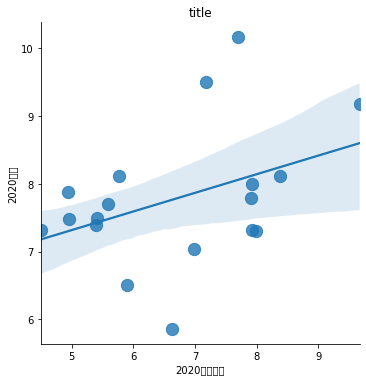

In [41]:
data = pd.concat([np.log(국내인구밀도['2020인구밀도']),np.log(국내인구밀도['2020인구'])],axis=1)
g=sns.lmplot('2020인구밀도','2020인구',data=data,fit_reg=True,scatter_kws={"s":150})
plt.title("title")
plt.show(g)

In [48]:
이주분석 = pd.read_csv('이주분석.csv',encoding='CP949')
이주분석=이주분석.set_index('응답자특성')
이주분석=이주분석.astype(float)
이주분석

,이주 계획 있음17,이주 계획 없음17,창녕군 내 타 읍면17,타 시군 농촌17,타 시군 도시17,1년 이내17,1~3년 이내17,3~5년 이내17,5년 이후17,경제적 문제17,...,3~5년 이내19,5년 이후19,경제적 문제19,주택 문제19,자녀 교육19,생활 편의시설 부족19,환경문제19,사업장 또는 직장19,마을주민과의 갈등문제19,기타19
응답자특성,,,,,,,,,,,,,,,,,,,,,
소계,14.9,85.1,16.1,17.2,66.7,16.1,43.5,18.3,22.0,9.1,...,21.0,41.0,17.5,8.5,10.5,13.0,8.5,33.0,4.0,5.0
귀농(농가),8.0,92.0,36.6,22.0,41.5,14.6,48.8,17.1,19.5,9.8,...,14.3,57.1,31.4,8.6,8.6,2.9,17.1,14.3,11.4,5.7
귀촌(비농가),19.6,80.4,10.3,15.9,73.8,16.6,42.1,18.6,22.8,9.0,...,22.4,37.6,14.6,8.5,10.9,15.2,6.7,37.0,2.4,4.9
남자,16.2,83.8,15.1,18.9,66.0,15.1,39.6,23.6,21.7,10.4,...,20.6,40.2,15.0,7.5,8.4,12.2,8.4,41.1,3.7,3.7
여자,13.4,86.6,17.5,15.0,67.5,17.5,48.8,11.3,22.5,7.5,...,21.5,41.9,20.4,9.7,12.9,14.0,8.6,23.7,4.3,6.5
19~29세,36.5,63.5,6.5,3.2,90.3,19.4,38.7,32.3,9.7,14.7,...,13.6,36.4,4.6,4.6,9.1,4.6,4.6,59.1,0.0,13.6
30~39세,31.3,68.7,13.0,4.3,82.6,10.9,45.7,15.2,28.3,4.3,...,23.3,39.5,9.3,14.0,23.3,9.3,4.7,39.5,0.0,0.0
40~49세,15.1,84.9,18.2,22.7,59.1,22.7,36.4,22.7,18.2,9.1,...,22.2,33.3,8.3,8.3,22.2,22.2,2.8,36.1,0.0,0.0
50~59세,11.3,88.7,22.7,27.3,50.0,15.9,43.2,15.9,25.0,9.1,...,21.7,45.0,28.3,6.7,1.7,10.0,11.7,31.7,6.7,3.3


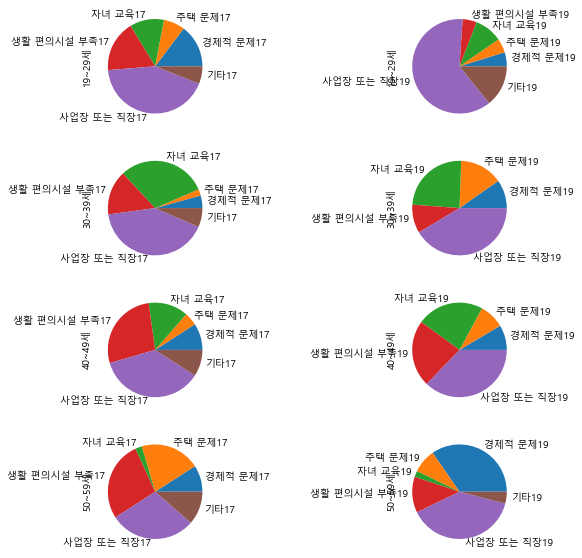

In [44]:
import platform
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', family='Malgun Gothic') 
matplotlib.rcParams['axes.unicode_minus'] = False

plt.subplot(421)
이주분석.loc['19~29세',['경제적 문제17','주택 문제17','자녀 교육17','생활 편의시설 부족17','사업장 또는 직장17','기타17']].plot(kind='pie')

plt.subplot(422)
이주분석.loc['19~29세',['경제적 문제19','주택 문제19','자녀 교육19','생활 편의시설 부족19','사업장 또는 직장19','기타19']].plot(kind='pie')

plt.subplot(423)
이주분석.loc['30~39세',['경제적 문제17','주택 문제17','자녀 교육17','생활 편의시설 부족17','사업장 또는 직장17','기타17']].plot(kind='pie')

plt.subplot(424)
이주분석.loc['30~39세',['경제적 문제19','주택 문제19','자녀 교육19','생활 편의시설 부족19','사업장 또는 직장19','기타19']].plot(kind='pie')

plt.subplot(425)
이주분석.loc['40~49세',['경제적 문제17','주택 문제17','자녀 교육17','생활 편의시설 부족17','사업장 또는 직장17','기타17']].plot(kind='pie')

plt.subplot(426)
이주분석.loc['40~49세',['경제적 문제19','주택 문제19','자녀 교육19','생활 편의시설 부족19','사업장 또는 직장19','기타19']].plot(kind='pie')

plt.subplot(427)
이주분석.loc['50~59세',['경제적 문제17','주택 문제17','자녀 교육17','생활 편의시설 부족17','사업장 또는 직장17','기타17']].plot(kind='pie')

plt.subplot(428)
이주분석.loc['50~59세',['경제적 문제19','주택 문제19','자녀 교육19','생활 편의시설 부족19','사업장 또는 직장19','기타19']].plot(kind='pie')


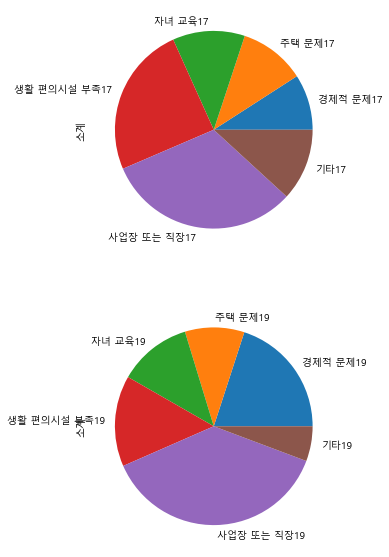

In [47]:
plt.subplot(211)
이주분석.loc['소계',['경제적 문제17','주택 문제17','자녀 교육17','생활 편의시설 부족17','사업장 또는 직장17','기타17']].plot(kind='pie')

plt.subplot(212)
이주분석.loc['소계',['경제적 문제19','주택 문제19','자녀 교육19','생활 편의시설 부족19','사업장 또는 직장19','기타19']].plot(kind='pie')
